Epoch 0, MSE: 1.7577
Epoch 100, MSE: 0.5896
Epoch 200, MSE: 0.3406
Epoch 300, MSE: 0.2714
Epoch 400, MSE: 0.2512
Epoch 500, MSE: 0.2450
Epoch 600, MSE: 0.2431
Epoch 700, MSE: 0.2424
Epoch 800, MSE: 0.2422
Epoch 900, MSE: 0.2421

Training results:
Final weights: w1 = 2.3476, w2 = 1.0218, bias = -0.2596
Accuracy: 100.00%


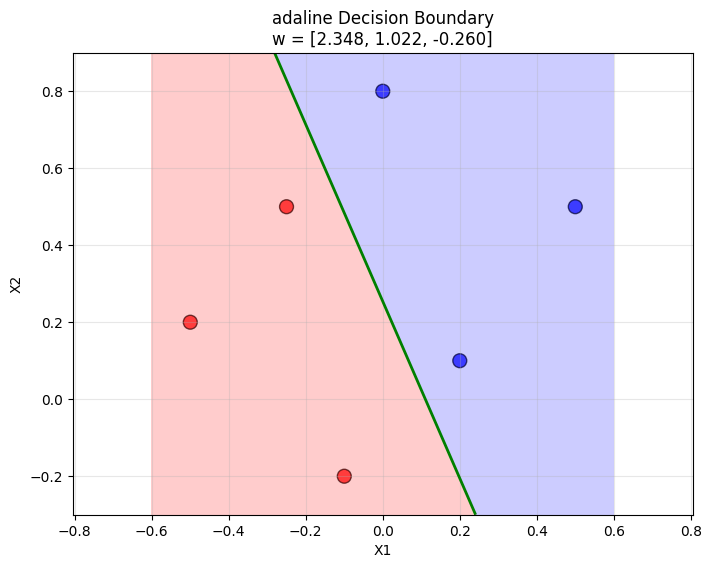

In [3]:
import numpy as np
import matplotlib.pyplot as plt


class ADALINE():
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.errors = []


    def net_input(self, X):
        return np.dot(X, self.weights)   
             

    def train(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features)
        
        for epoch in range(self.epochs):
            total_error = 0

            for i in range(n_samples): 
                error = y[i] - self.net_input(X[i])
                total_error += error ** 2
                self.weights += self.learning_rate * error * X[i]
            
            mse = total_error / n_samples
            self.errors.append(mse)
            
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, MSE: {mse:.4f}")
                
            if mse < 0.001:
                print(f"Converged at epoch {epoch}")
                break
    

    def predict(self, X):
        net_input = self.net_input(X)
        return np.where(net_input >= 0, 1, -1)  

def plot_decision_boundary(w, X, y, title):
    """绘制决策边界"""
    plt.figure(figsize=(8, 6))
    
    # 绘制数据点
    colors = ['red' if label == -1 else 'blue' for label in y]
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=100, alpha=0.7, edgecolors='black')
    
    # 生成决策边界
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    
    # 创建网格点
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # 计算每个网格点的决策值
    Z = w[0] * xx + w[1] * yy + w[2]
    
    # 绘制决策边界 (Z=0 的等高线)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='green')
    
    # 填充决策区域
    plt.contourf(xx, yy, Z, levels=[-100, 0, 100], alpha=0.2, colors=['red', 'blue'])
    
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f'{title} Decision Boundary\nw = [{w[0]:.3f}, {w[1]:.3f}, {w[2]:.3f}]')
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    plt.show()


if __name__ == '__main__':
    ## load the data
    coordinates = np.array([[x[0], x[1], 1] for x in [(-0.1, -0.2), (0.5, 0.5), (-0.5, 0.2), (-0.25, 0.5), (0.2, 0.1), (0, 0.8)]])
    labels = np.array([-1, 1, -1, -1, 1, 1])
    lr1, lr2 = 0.01, 0.05
    max_epoch = 1000
    # print("Sample data:")
    # for i, (coord, label) in enumerate(zip(coordinates, labels)):
    #     print(f"Sample {i+1}: coordinates({coord[0]:.2f}, {coord[1]:.2f}), label: {label}")

    adaline = ADALINE(learning_rate = lr1, epochs = max_epoch)
    adaline.train(coordinates, labels)

    print("\nTraining results:")
    print(f"Final weights: w1 = {adaline.weights[0]:.4f}, w2 = {adaline.weights[1]:.4f}, bias = {adaline.weights[2]:.4f}")
    ## Predict training samples
    predictions = adaline.predict(coordinates)
    print(f"Accuracy: {np.mean(predictions == labels) * 100:.2f}%")


    ## Visualization
    plot_decision_boundary(adaline.weights, coordinates, labels, 'adaline')
